# The following notebook does the fllowing operations:
* Reads the 2mm brainetome atlas file in standard MNI152 space
* Reads the thresholded 2mm Tvalues files created in previous step - Negative and positive t values
* Iterates over each of them and calculate the following for each ROI:
    * Number of voxels
    * Number of voxels > 0 in Negative t values file (Absolute)
    * Number of voxels > 0 in Positive t values file
    


In [1]:
# Read the atlas
import nibabel as nib
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd

In [2]:
# Read Brainnetome atlas
atlas_path = 'BNA-maxprob-thr0-2mm.nii.gz'
atlas = nib.load(atlas_path).get_data()

In [3]:
np.min(atlas), np.max(atlas)

(0.0, 246.0)

In [4]:
# Loop over the two brains to compute the ROI wise t value stats

# Read the two brains
absNegTvalsBrainPath = 'tValNegThrAbs.nii.gz' 
posTvalsBrainPath = 'tValPosThr.nii.gz'

numVoxelsPerRoi = []
numPosVoxelsPerRoi = []
numNegVoxelsPerRoi = []

negClusterStats = np.zeros((int(np.max(atlas)), int(np.max(atlas)) ))
posClusterStats = np.zeros((int(np.max(atlas)), int(np.max(atlas)) ))


absNegTvalsBrain = nib.load(absNegTvalsBrainPath).get_data()
posTvalsBrain = nib.load(posTvalsBrainPath).get_data()

# Need to work more on Vol_ROI and roi both they are wrong.

for vol_roi in tqdm(range(int(np.max(atlas)))):
    numVoxelsPerRoi.append(len(np.where(atlas == vol_roi + 1)[0]))
#     print(vol_roi)
    for roi in range(int(np.max(atlas))):
        temp = posTvalsBrain[:,:,:,vol_roi][np.where(atlas == roi + 1)]
        posClusterStats[vol_roi,roi] = len(np.where(temp > 0 )[0])

        temp = absNegTvalsBrain[:,:,:,vol_roi][np.where(atlas == roi + 1)]
        negClusterStats[vol_roi,roi] = len(np.where(temp > 0 )[0])
    

print('Saving the calculated Arrays ')
np.save('numVoxelsPerRoi',numVoxelsPerRoi)
np.save('negClusterStats',negClusterStats)
np.save('posClusterStats',posClusterStats)



100%|██████████| 246/246 [05:38<00:00,  1.37s/it]

Saving the calculated Arrays 


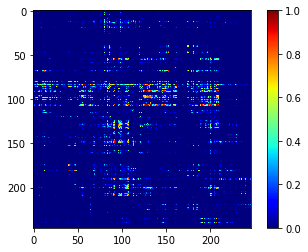

In [5]:

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = ax.imshow(np.divide(negClusterStats,numVoxelsPerRoi), cmap=plt.cm.jet, 
                interpolation='nearest')

cb = fig.colorbar(res)
plt.savefig("roiXroi.png", format="png")


In [6]:
# Finding the density of correlations

# negClusterStats.shape
numVoxelsPerRoi = np.array(numVoxelsPerRoi).reshape(1,len(numVoxelsPerRoi))
numVoxelsPerRoi.shape

(1, 246)

In [7]:
# negClusterStats[:,100]

In [8]:
# 208/0.231, 37/0.05, 13/0.02229846, 73/0.12521441

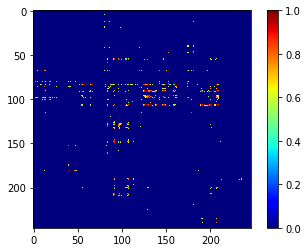

In [9]:
negClusterStatsDensity = np.divide(negClusterStats,numVoxelsPerRoi) 

negClusterStatsDensityThreshZero = negClusterStatsDensity < 0.5
negClusterStatsDensityThreshOne = negClusterStatsDensity >= 0.5

negClusterStatsDensity[negClusterStatsDensityThreshZero] = 0


fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = ax.imshow(negClusterStatsDensity, cmap=plt.cm.jet, 
                interpolation='nearest')

cb = fig.colorbar(res)
plt.savefig("roiXroi.png", format="png")



In [10]:
np.savetxt('negClusterStatsDensity.csv',negClusterStatsDensity,fmt='%3.5f',delimiter=',')

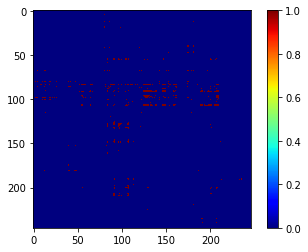

In [13]:
# Binarize

negClusterStatsDensity[negClusterStatsDensityThreshOne] = 1


fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = ax.imshow(negClusterStatsDensity, cmap=plt.cm.jet, 
                interpolation='nearest')

cb = fig.colorbar(res)
plt.savefig("roiXroi.png", format="png")




In [14]:
np.savetxt('negClusterStatsDensityBinary.csv',negClusterStatsDensity,fmt='%3.5f',delimiter=',')

In [29]:
hypoConnInfo = []
for vol_roi in range(negClusterStatsDensity.shape[0]):
    idx = np.where(negClusterStatsDensity[vol_roi,:] == 1)[0]
    if len(idx) > 0:
        hypoConnInfo.append([vol_roi+1, idx])
    
    
    

In [49]:
hypoConnInfo

[[6, array([80])],
 [13, array([ 80,  83,  86, 181])],
 [14, array([ 80,  83,  86, 113, 142, 152, 153, 174, 175, 180, 181])],
 [19, array([80])],
 [20, array([80, 98])],
 [41, array([174, 175, 181])],
 [42, array([174, 175, 181])],
 [43, array([ 80,  86, 120])],
 [47, array([181])],
 [48, array([152, 153, 174, 175, 180, 181])],
 [55, array([ 84,  90,  91,  96, 104, 105, 107, 127, 147, 200, 207])],
 [56, array([ 84,  90,  91,  96,  97,  99, 104, 105, 107, 125, 127, 129, 147,
         188, 200, 201, 205])],
 [58, array([ 84, 200])],
 [60, array([84])],
 [66, array([84, 91])],
 [69, array([  5,  12,  13,  14,  74,  80,  84,  86, 120, 122, 142, 150, 152,
         153, 174, 175, 178, 180, 181, 196, 197])],
 [81, array([  2,   4,   5,  10,  12,  13,  14,  18,  19,  26,  40,  42,  47,
         142, 152, 153, 174, 175])],
 [83, array([142, 152, 174, 180])],
 [84, array([  5,  12,  13,  86, 120, 122, 142, 143, 146, 150, 152, 153, 174,
         175, 180, 181, 184, 185])],
 [85, array([  8,   9, 

In [66]:
atlasRegionsDescrpPath = '/home/varun/Projects/fmri/Autism-Connectome-Analysis-brain_connectivity/atlas/BNA_subregions.xlsx'
df = pd.read_excel(atlasRegionsDescrpPath)
# df
df = df.as_matrix(['Label ID.L', 'Label ID.R','Left and Right Hemisphere','Unnamed: 5'])
df

array([[1, 2, 'SFG_L(R)_7_1', 'A8m, medial area 8'],
       [3, 4, 'SFG_L(R)_7_2', 'A8dl, dorsolateral area 8'],
       [5, 6, 'SFG_L(R)_7_3', 'A9l, lateral area 9'],
       [7, 8, 'SFG_L(R)_7_4', 'A6dl, dorsolateral area 6'],
       [9, 10, 'SFG_L(R)_7_5', 'A6m, medial area 6'],
       [11, 12, 'SFG_L(R)_7_6', 'A9m,medial area 9'],
       [13, 14, 'SFG_L(R)_7_7', 'A10m, medial area 10'],
       [15, 16, 'MFG_L(R)_7_1', 'A9/46d, dorsal area 9/46'],
       [17, 18, 'MFG_L(R)_7_2', 'IFJ, inferior frontal junction'],
       [19, 20, 'MFG_L(R)_7_3', 'A46, area 46'],
       [21, 22, 'MFG_L(R)_7_4', 'A9/46v, ventral area 9/46 '],
       [23, 24, 'MFG_L(R)_7_5', 'A8vl, ventrolateral area 8'],
       [25, 26, 'MFG_L(R)_7_6', 'A6vl, ventrolateral area 6'],
       [27, 28, 'MFG_L(R)_7_7', 'A10l, lateral area10'],
       [29, 30, 'IFG_L(R)_6_1', 'A44d,dorsal area 44'],
       [31, 32, 'IFG_L(R)_6_2', 'IFS, inferior frontal sulcus'],
       [33, 34, 'IFG_L(R)_6_3', 'A45c, caudal area 45'],
       

In [71]:
numSeeds = 246
seedInfo = np.empty((numSeeds + 1, 2),dtype=object)
for i,j,region,label in df:
    seedInfo[i,:] = i, region + '_' + label
    seedInfo[j,:] = j, region + '_' + label

In [73]:
seedInfo[1:]

array([[1, 'SFG_L(R)_7_1_A8m, medial area 8'],
       [2, 'SFG_L(R)_7_1_A8m, medial area 8'],
       [3, 'SFG_L(R)_7_2_A8dl, dorsolateral area 8'],
       [4, 'SFG_L(R)_7_2_A8dl, dorsolateral area 8'],
       [5, 'SFG_L(R)_7_3_A9l, lateral area 9'],
       [6, 'SFG_L(R)_7_3_A9l, lateral area 9'],
       [7, 'SFG_L(R)_7_4_A6dl, dorsolateral area 6'],
       [8, 'SFG_L(R)_7_4_A6dl, dorsolateral area 6'],
       [9, 'SFG_L(R)_7_5_A6m, medial area 6'],
       [10, 'SFG_L(R)_7_5_A6m, medial area 6'],
       [11, 'SFG_L(R)_7_6_A9m,medial area 9'],
       [12, 'SFG_L(R)_7_6_A9m,medial area 9'],
       [13, 'SFG_L(R)_7_7_A10m, medial area 10'],
       [14, 'SFG_L(R)_7_7_A10m, medial area 10'],
       [15, 'MFG_L(R)_7_1_A9/46d, dorsal area 9/46'],
       [16, 'MFG_L(R)_7_1_A9/46d, dorsal area 9/46'],
       [17, 'MFG_L(R)_7_2_IFJ, inferior frontal junction'],
       [18, 'MFG_L(R)_7_2_IFJ, inferior frontal junction'],
       [19, 'MFG_L(R)_7_3_A46, area 46'],
       [20, 'MFG_L(R)_7_3_A46, area

In [74]:
# Create a dictionary of seedInfo

d = {}
for i in seedInfo[1:]:
    d[i[0]] = i[1]
    

In [99]:
def queryDict(lis):
    return_regions = []
    for i in lis:
        return_regions.append(str(i)+"_"+d[i])
    return return_regions
        

In [100]:
df_new = pd.DataFrame(columns=["seedNumber", "seedName","connections"])
for i in range(len(hypoConnInfo)):
    roi = hypoConnInfo[i][0]
    seed = d[roi]
    connections = queryDict(hypoConnInfo[i][1])
#     print(roi,seed,connections)
    df_new = df_new.append({
     "seedNumber": roi,
     "seedName": seed ,
     "connections": connections
      }, ignore_index=True)
    
    

In [101]:
df_new.to_csv('hypoConnSeeds.csv')

In [102]:
df_new

,seedNumber,seedName,connections
0,6,"SFG_L(R)_7_3_A9l, lateral area 9","[80_STG_L(R)_6_6_A22r, rostral area 22]"
1,13,"SFG_L(R)_7_7_A10m, medial area 10","[80_STG_L(R)_6_6_A22r, rostral area 22, 83_MTG..."
2,14,"SFG_L(R)_7_7_A10m, medial area 10","[80_STG_L(R)_6_6_A22r, rostral area 22, 83_MTG..."
3,19,"MFG_L(R)_7_3_A46, area 46","[80_STG_L(R)_6_6_A22r, rostral area 22]"
4,20,"MFG_L(R)_7_3_A46, area 46","[80_STG_L(R)_6_6_A22r, rostral area 22, 98_ITG..."
5,41,"OrG_L(R)_6_1_A14m, medial area 14","[174_INS_L(R)_6_6_dId, dorsal dysgranular insu..."
6,42,"OrG_L(R)_6_1_A14m, medial area 14","[174_INS_L(R)_6_6_dId, dorsal dysgranular insu..."
7,43,"OrG_L(R)_6_2_A12/47o, orbital area 12/47","[80_STG_L(R)_6_6_A22r, rostral area 22, 86_MTG..."
8,47,"OrG_L(R)_6_4_A11m, medial area 11","[181_CG_L(R)_7_4_A23v, ventral area 23]"
9,48,"OrG_L(R)_6_4_A11m, medial area 11","[152_PCun_L(R)_4_3_dmPOS, dorsomedial parietoo..."


## Report HO atlas regions instead of Brainnetome regions

In [99]:
def queryDict(lis):
    return_regions = []
    for i in lis:
        return_regions.append(str(i)+"_"+d[i])
    return return_regions
        

In [100]:
df_new_HO = pd.DataFrame(columns=["seedNumber", "seedName","connections"])
for i in range(len(hypoConnInfo)):
    roi = hypoConnInfo[i][0]
    seed = d[roi]
    connections = queryDict(hypoConnInfo[i][1])
    
    seed_HO = 
    
#     print(roi,seed,connections)
    df_new = df_new.append({
     "seedNumber": roi,
     "seedName": seed ,
     "connections": connections
      }, ignore_index=True)
    
    

In [ ]:
import subprocess

p1 = subprocess.Popen(["atlasquery", "-a", "Harvard-Oxford Cortical Structural Atlas", "-c", coord ], stdout=subprocess.PIPE)
p2 = subprocess.Popen(["atlasquery", "-a", "Harvard-Oxford Subcortical Structural Atlas", "-c", coord], stdout=subprocess.PIPE)

out1 = p1.communicate()
out2 = p2.communicate()
out3 = p3.communicate()

d = {'ROI':[roi], 'Voxels':[row[0]], 'Max_tvalue':[row[1]], 'MNI(X Y Z)':[coord], 'Harvard-Oxford Cortical Structural Atlas':[str(out1[0]).split('>')[3]], 'Harvard-Oxford Subcortical Structural Atlas':str(out2[0]).split('>')[3], 'Juelich Histological Atlas':str(out3[0]).split('>')[3]}


In [ ]:
f = open('filr=log.txt',mode='a+')

In [ ]:
text =  'Computing stats for ROI: ' + str(roi_vol) + '\n'
f.write()